# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 18:48:52.897536: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T18:48:56.375695
2025-04-14 18:48:56.375695


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 2
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 509
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 18:48:49"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

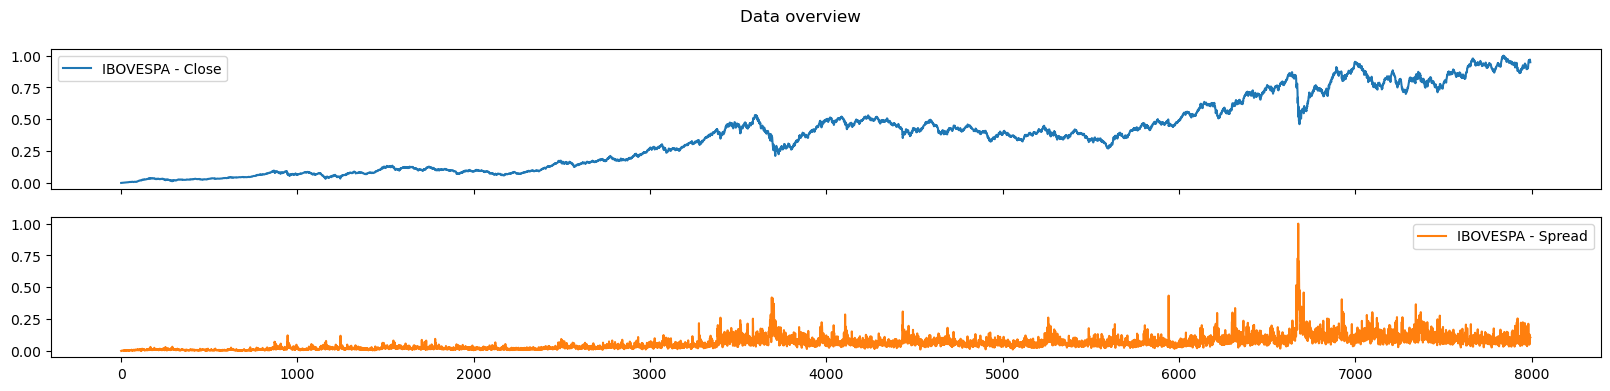

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

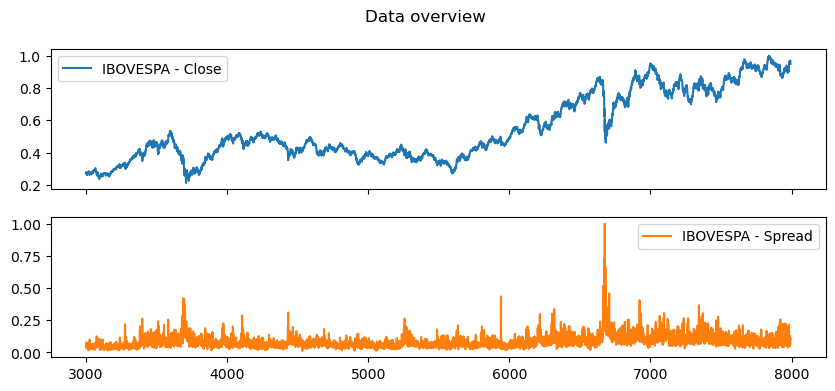

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

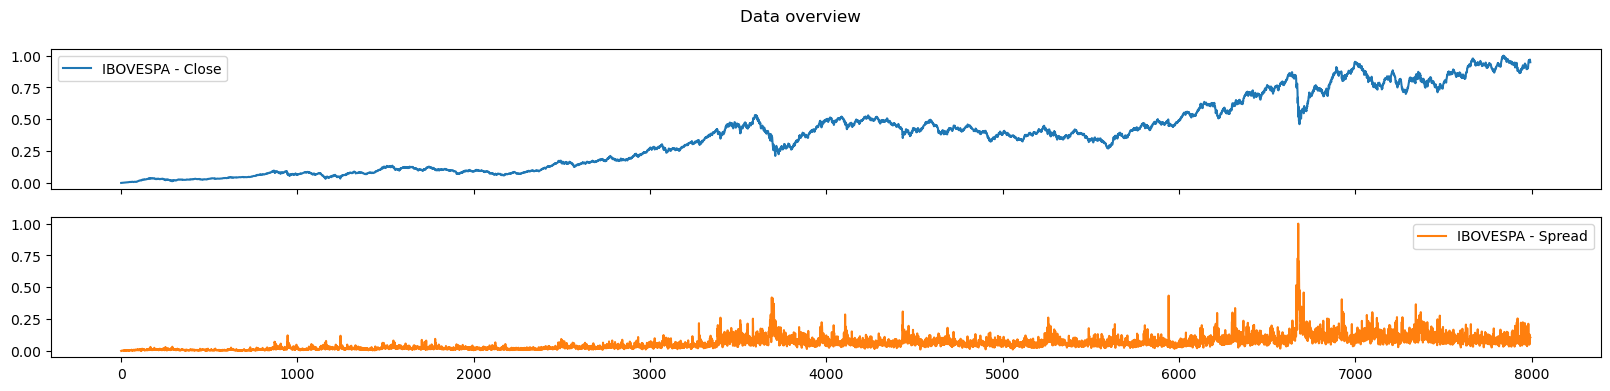

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

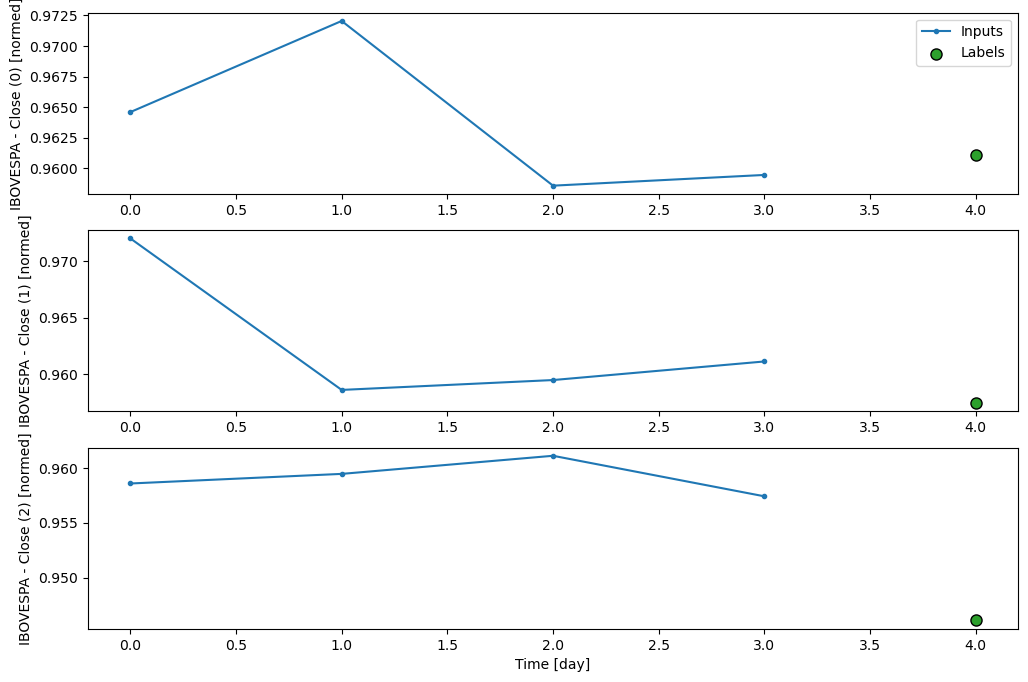

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

2

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11:56 3s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 59.6889 - mean_squared_error: 9.0964e-05 - root_mean_squared_error: 0.0084   

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 54.7192 - mean_squared_error: 1.3498e-04 - root_mean_squared_error: 0.0109

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 47.3842 - mean_squared_error: 1.3549e-04 - root_mean_squared_error: 0.0111

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.8392 - mean_squared_error: 1.5097e-04 - root_mean_squared_error: 0.0119

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 40.2387 - mean_squared_error: 1.7753e-04 - root_mean_squared_error: 0.0129

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 38.5433 - mean_squared_error: 1.9717e-04 - root_mean_squared_error: 0.0135

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 37.2306 - mean_squared_error: 2.0950e-04 - root_mean_squared_error: 0.0140

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 35.6752 - mean_squared_error: 2.2532e-04 - root_mean_squared_error: 0.0145

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 34.6352 - mean_squared_error: 2.5377e-04 - root_mean_squared_error: 0.0153

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 33.6061 - mean_squared_error: 2.8559e-04 - root_mean_squared_error: 0.0162

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 32.6525 - mean_squared_error: 3.2286e-04 - root_mean_squared_error: 0.0171

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 31.8817 - mean_squared_error: 3.7487e-04 - root_mean_squared_error: 0.0182

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 31.1367 - mean_squared_error: 4.6358e-04 - root_mean_squared_error: 0.0198

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 30.5581 - mean_squared_error: 6.7502e-04 - root_mean_squared_error: 0.0226

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 29.9692 - mean_squared_error: 8.9214e-04 - root_mean_squared_error: 0.0254

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 29.4545 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0276    

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 28.9278 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0297

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 28.4668 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0314

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 28.0331 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0328

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 27.6678 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0341

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 27.2326 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0354

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 26.8582 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0367

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 26.5056 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0381

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 26.1581 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0393


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 26.0897 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395 - val_loss: 0.0854 - val_mean_absolute_error: 0.0854 - val_mean_absolute_percentage_error: 9.1016 - val_mean_squared_error: 0.0084 - val_root_mean_squared_error: 0.0918


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.6367 - mean_absolute_error: 0.6367 - mean_absolute_percentage_error: 29871.3906 - mean_squared_error: 0.4054 - root_mean_squared_error: 0.6367

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6281 - mean_absolute_error: 0.6281 - mean_absolute_percentage_error: 14802.2158 - mean_squared_error: 0.3948 - root_mean_squared_error: 0.6283  

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6028 - mean_absolute_error: 0.6028 - mean_absolute_percentage_error: 10721.8457 - mean_squared_error: 0.3661 - root_mean_squared_error: 0.6044

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.5714 - mean_absolute_error: 0.5714 - mean_absolute_percentage_error: 8936.5537 - mean_squared_error: 0.3366 - root_mean_squared_error: 0.5779

 24/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.5262 - mean_absolute_error: 0.5262 - mean_absolute_percentage_error: 7518.7812 - mean_squared_error: 0.3016 - root_mean_squared_error: 0.5443 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4986 - mean_absolute_error: 0.4986 - mean_absolute_percentage_error: 6825.6689 - mean_squared_error: 0.2815 - root_mean_squared_error: 0.5237

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4554 - mean_absolute_error: 0.4554 - mean_absolute_percentage_error: 5904.8706 - mean_squared_error: 0.2519 - root_mean_squared_error: 0.4921 

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4190 - mean_absolute_error: 0.4190 - mean_absolute_percentage_error: 5225.7412 - mean_squared_error: 0.2282 - root_mean_squared_error: 0.4652

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3845 - mean_absolute_error: 0.3845 - mean_absolute_percentage_error: 4636.1118 - mean_squared_error: 0.2064 - root_mean_squared_error: 0.4393

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3661 - mean_absolute_error: 0.3661 - mean_absolute_percentage_error: 4337.6230 - mean_squared_error: 0.1950 - root_mean_squared_error: 0.4252

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3527 - mean_absolute_error: 0.3527 - mean_absolute_percentage_error: 4128.1650 - mean_squared_error: 0.1868 - root_mean_squared_error: 0.4149

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3496 - mean_absolute_error: 0.3496 - mean_absolute_percentage_error: 4079.2952 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.4125

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3465 - mean_absolute_error: 0.3465 - mean_absolute_percentage_error: 4031.7109 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.4100

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3291 - mean_absolute_error: 0.3291 - mean_absolute_percentage_error: 3770.4775 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3964

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3161 - mean_absolute_error: 0.3161 - mean_absolute_percentage_error: 3580.0706 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3861

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2976 - mean_absolute_error: 0.2976 - mean_absolute_percentage_error: 3316.3921 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3712

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2835 - mean_absolute_error: 0.2835 - mean_absolute_percentage_error: 3118.7583 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3595

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2725 - mean_absolute_error: 0.2725 - mean_absolute_percentage_error: 2969.0718 - mean_squared_error: 0.1394 - root_mean_squared_error: 0.3504

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2626 - mean_absolute_error: 0.2626 - mean_absolute_percentage_error: 2834.5823 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3419

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 2693.8486 - mean_squared_error: 0.1276 - root_mean_squared_error: 0.3329

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2467 - mean_absolute_error: 0.2467 - mean_absolute_percentage_error: 2620.1875 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3280

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2379 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 2501.5142 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3201

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2291 - mean_absolute_error: 0.2291 - mean_absolute_percentage_error: 2379.8230 - mean_squared_error: 0.1140 - root_mean_squared_error: 0.3120

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 2270.5793 - mean_squared_error: 0.1092 - root_mean_squared_error: 0.3045

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2148 - mean_absolute_error: 0.2148 - mean_absolute_percentage_error: 2183.7021 - mean_squared_error: 0.1054 - root_mean_squared_error: 0.2984 

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2097 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 2114.8948 - mean_squared_error: 0.1024 - root_mean_squared_error: 0.2934

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 2040.4403 - mean_squared_error: 0.0991 - root_mean_squared_error: 0.2880 

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1990 - mean_absolute_error: 0.1990 - mean_absolute_percentage_error: 1971.5588 - mean_squared_error: 0.0961 - root_mean_squared_error: 0.2829

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1934 - mean_absolute_error: 0.1934 - mean_absolute_percentage_error: 1898.8678 - mean_squared_error: 0.0928 - root_mean_squared_error: 0.2774

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1889 - mean_absolute_error: 0.1889 - mean_absolute_percentage_error: 1839.9481 - mean_squared_error: 0.0902 - root_mean_squared_error: 0.2728

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1840 - mean_absolute_error: 0.1840 - mean_absolute_percentage_error: 1777.3732 - mean_squared_error: 0.0874 - root_mean_squared_error: 0.2679

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1801 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 1726.3586 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2638

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1759 - mean_absolute_error: 0.1759 - mean_absolute_percentage_error: 1671.8820 - mean_squared_error: 0.0826 - root_mean_squared_error: 0.2594

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1725 - mean_absolute_error: 0.1725 - mean_absolute_percentage_error: 1627.2273 - mean_squared_error: 0.0806 - root_mean_squared_error: 0.2558

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1688 - mean_absolute_error: 0.1688 - mean_absolute_percentage_error: 1579.3071 - mean_squared_error: 0.0784 - root_mean_squared_error: 0.2518

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1658 - mean_absolute_error: 0.1658 - mean_absolute_percentage_error: 1539.8607 - mean_squared_error: 0.0766 - root_mean_squared_error: 0.2485

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1625 - mean_absolute_error: 0.1625 - mean_absolute_percentage_error: 1497.3564 - mean_squared_error: 0.0747 - root_mean_squared_error: 0.2450

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1591 - mean_absolute_error: 0.1591 - mean_absolute_percentage_error: 1452.5205 - mean_squared_error: 0.0726 - root_mean_squared_error: 0.2411


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1584 - mean_absolute_error: 0.1584 - mean_absolute_percentage_error: 1442.9658 - mean_squared_error: 0.0722 - root_mean_squared_error: 0.2403 - val_loss: 0.0358 - val_mean_absolute_error: 0.0358 - val_mean_absolute_percentage_error: 3.8079 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0404


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.4706 - mean_absolute_error: 0.4706 - mean_absolute_percentage_error: 22077.2363 - mean_squared_error: 0.2214 - root_mean_squared_error: 0.4706

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4620 - mean_absolute_error: 0.4620 - mean_absolute_percentage_error: 9129.7256 - mean_squared_error: 0.2136 - root_mean_squared_error: 0.4621  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4453 - mean_absolute_error: 0.4453 - mean_absolute_percentage_error: 6891.2373 - mean_squared_error: 0.1998 - root_mean_squared_error: 0.4465

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4089 - mean_absolute_error: 0.4089 - mean_absolute_percentage_error: 5390.4653 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.4176

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3742 - mean_absolute_error: 0.3742 - mean_absolute_percentage_error: 4559.9824 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3924

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3396 - mean_absolute_error: 0.3396 - mean_absolute_percentage_error: 3911.3940 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3677

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3136 - mean_absolute_error: 0.3136 - mean_absolute_percentage_error: 3486.2207 - mean_squared_error: 0.1281 - root_mean_squared_error: 0.3491

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2914 - mean_absolute_error: 0.2914 - mean_absolute_percentage_error: 3152.9482 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3329

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2724 - mean_absolute_error: 0.2724 - mean_absolute_percentage_error: 2883.9119 - mean_squared_error: 0.1094 - root_mean_squared_error: 0.3189

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 2713.5884 - mean_squared_error: 0.1038 - root_mean_squared_error: 0.3095

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2452 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 2518.6047 - mean_squared_error: 0.0973 - root_mean_squared_error: 0.2981

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 2411.8296 - mean_squared_error: 0.0937 - root_mean_squared_error: 0.2917

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2263 - mean_absolute_error: 0.2263 - mean_absolute_percentage_error: 2278.2441 - mean_squared_error: 0.0891 - root_mean_squared_error: 0.2833

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 2128.8921 - mean_squared_error: 0.0839 - root_mean_squared_error: 0.2736

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2035 - mean_absolute_error: 0.2035 - mean_absolute_percentage_error: 1999.7776 - mean_squared_error: 0.0793 - root_mean_squared_error: 0.2649

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1960 - mean_absolute_error: 0.1960 - mean_absolute_percentage_error: 1910.7631 - mean_squared_error: 0.0761 - root_mean_squared_error: 0.2587

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1892 - mean_absolute_error: 0.1892 - mean_absolute_percentage_error: 1830.1377 - mean_squared_error: 0.0732 - root_mean_squared_error: 0.2529

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1830 - mean_absolute_error: 0.1830 - mean_absolute_percentage_error: 1756.7274 - mean_squared_error: 0.0705 - root_mean_squared_error: 0.2475

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1773 - mean_absolute_error: 0.1773 - mean_absolute_percentage_error: 1689.5642 - mean_squared_error: 0.0681 - root_mean_squared_error: 0.2425

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1727 - mean_absolute_error: 0.1727 - mean_absolute_percentage_error: 1636.3615 - mean_squared_error: 0.0661 - root_mean_squared_error: 0.2384

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1691 - mean_absolute_error: 0.1691 - mean_absolute_percentage_error: 1594.7786 - mean_squared_error: 0.0646 - root_mean_squared_error: 0.2352

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1643 - mean_absolute_error: 0.1643 - mean_absolute_percentage_error: 1540.3406 - mean_squared_error: 0.0626 - root_mean_squared_error: 0.2309

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1593 - mean_absolute_error: 0.1593 - mean_absolute_percentage_error: 1482.9445 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2263

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1534 - mean_absolute_error: 0.1534 - mean_absolute_percentage_error: 1417.5128 - mean_squared_error: 0.0580 - root_mean_squared_error: 0.2209

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1491 - mean_absolute_error: 0.1491 - mean_absolute_percentage_error: 1369.5791 - mean_squared_error: 0.0562 - root_mean_squared_error: 0.2168

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1446 - mean_absolute_error: 0.1446 - mean_absolute_percentage_error: 1319.7535 - mean_squared_error: 0.0543 - root_mean_squared_error: 0.2126

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 1278.7039 - mean_squared_error: 0.0527 - root_mean_squared_error: 0.2090

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - mean_absolute_percentage_error: 1240.3748 - mean_squared_error: 0.0512 - root_mean_squared_error: 0.2056

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1341 - mean_absolute_error: 0.1341 - mean_absolute_percentage_error: 1204.4958 - mean_squared_error: 0.0499 - root_mean_squared_error: 0.2024

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 1170.8311 - mean_squared_error: 0.0486 - root_mean_squared_error: 0.1993

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 1135.3492 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.1960


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1257 - mean_absolute_error: 0.1257 - mean_absolute_percentage_error: 1112.9884 - mean_squared_error: 0.0463 - root_mean_squared_error: 0.1939 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1386 - val_mean_squared_error: 1.7810e-04 - val_root_mean_squared_error: 0.0133


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1450 - mean_absolute_error: 0.1450 - mean_absolute_percentage_error: 6806.3271 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1450

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1268 - mean_absolute_error: 0.1268 - mean_absolute_percentage_error: 3068.0627 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1287 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 1961.6254 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1072

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 1525.0756 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0950

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 1236.0167 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0855

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 1065.4330 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0792

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 940.4102 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0742 

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 844.2400 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0701

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 767.6829 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0667

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 727.2037 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0648

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 698.0854 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0633

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 652.9042 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0611

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 619.0328 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0594

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 598.5346 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0583

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 574.9336 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0570

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 561.7366 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0563

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 545.1497 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0554

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 511.5150 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0535

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 488.3611 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0522

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 459.0240 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0504

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 430.9231 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0487

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 406.3609 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0472

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 386.5552 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0460

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 367.0801 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0447

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 351.1554 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0436

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 336.6789 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0426

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 323.4544 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0417

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 311.3215 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0409

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 300.1476 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0401

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 289.8192 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0394


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 283.9898 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0390 - val_loss: 0.0083 - val_mean_absolute_error: 0.0083 - val_mean_absolute_percentage_error: 0.9170 - val_mean_squared_error: 1.0900e-04 - val_root_mean_squared_error: 0.0104


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 4657.1211 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0991

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 1943.1592 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0827 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 1377.6544 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0715

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 1061.9087 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0634

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 894.6475 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0585 

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 750.3331 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0537

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 659.5981 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0503

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 598.1346 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0479

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 554.7847 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0460

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 529.5965 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0449

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 501.5296 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 476.6398 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0425

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 458.6373 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 442.0933 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 434.3135 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 426.8339 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 423.2011 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 416.1406 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 402.7803 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 387.3662 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 378.7315 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 370.5144 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 365.2529 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 357.6651 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 352.7982 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 345.7676 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 334.7184 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

122/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 330.5152 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 328.4572 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 322.4504 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

129/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 316.6823 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 309.3377 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 307.5601 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

138/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 300.6702 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

141/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 295.7228 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

147/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 286.3491 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

152/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 279.0247 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

157/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 272.1025 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

159/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 269.4387 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

161/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 266.8320 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

163/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 264.2805 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

167/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 259.3359 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 252.2907 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 244.5872 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 236.3949 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 227.8716 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 219.9984 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 211.9239 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0280

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 204.4758 - mean_squared_error: 9.7997e-04 - root_mean_squared_error: 0.0275

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 196.2651 - mean_squared_error: 9.4543e-04 - root_mean_squared_error: 0.0270


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 195.6145 - mean_squared_error: 9.4269e-04 - root_mean_squared_error: 0.0270 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0777 - val_mean_squared_error: 1.5390e-04 - val_root_mean_squared_error: 0.0124


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 4027.8438 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0857

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 1495.1295 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0680 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 1008.5635 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0583

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 799.6027 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0528 

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 657.8532 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0483

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 563.2086 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0450

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 494.6808 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0422

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 442.5689 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 401.4943 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 368.1578 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 340.4558 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 317.0264 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 298.8065 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 287.9099 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 271.6055 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 258.5939 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 245.6700 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 234.1014 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 223.6818 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 215.1488 - mean_squared_error: 9.9604e-04 - root_mean_squared_error: 0.0289

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 206.4791 - mean_squared_error: 9.6598e-04 - root_mean_squared_error: 0.0285

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 198.5512 - mean_squared_error: 9.3861e-04 - root_mean_squared_error: 0.0281

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 191.9714 - mean_squared_error: 9.1613e-04 - root_mean_squared_error: 0.0278

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 185.2059 - mean_squared_error: 8.9369e-04 - root_mean_squared_error: 0.0274

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 179.5527 - mean_squared_error: 8.7506e-04 - root_mean_squared_error: 0.0272


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 174.8401 - mean_squared_error: 8.5955e-04 - root_mean_squared_error: 0.0269 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1473 - val_mean_squared_error: 1.7306e-04 - val_root_mean_squared_error: 0.0132


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.1379 - mean_absolute_error: 0.1379 - mean_absolute_percentage_error: 6476.5205 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1379

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1151 - mean_absolute_error: 0.1151 - mean_absolute_percentage_error: 2346.7876 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1178 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 1663.3959 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1021

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 1314.3151 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0913

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 1116.8817 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0842

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 975.8912 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0785 

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 869.6102 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0739

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 777.0670 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0697

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 696.8934 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0657

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 633.1674 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0624

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 581.1334 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0596

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 537.7567 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0571

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 504.4040 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0552

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 475.3232 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0534

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 447.0642 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0517

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 424.6194 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0503

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 402.4226 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0489

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 384.5192 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0477

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 366.5744 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0465

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 351.9293 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0455

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 337.0938 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0445

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 324.8677 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0436

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 312.3760 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0427

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 302.0039 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0420

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 292.3637 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0413

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 283.3770 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0407


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 278.6439 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0404 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084 - val_mean_absolute_percentage_error: 0.9233 - val_mean_squared_error: 1.0948e-04 - val_root_mean_squared_error: 0.0105


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 4:09 1s/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 4284.1416 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0912

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 1929.8810 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0808 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 1283.2594 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 941.2084 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601 

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 755.5973 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0542

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 646.7338 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0502

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 560.5533 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0466

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 508.0138 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0443

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 455.9680 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 418.3011 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 386.9668 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 360.4516 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 335.3470 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 315.8540 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 296.9652 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 280.4367 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 265.8252 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 254.0402 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 242.2280 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 233.6156 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 224.6997 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 215.6322 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 207.3355 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 199.7128 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 192.6826 - mean_squared_error: 9.7292e-04 - root_mean_squared_error: 0.0281

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 186.1764 - mean_squared_error: 9.4631e-04 - root_mean_squared_error: 0.0277


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 183.7086 - mean_squared_error: 9.3620e-04 - root_mean_squared_error: 0.0275 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6456 - val_mean_squared_error: 5.5599e-05 - val_root_mean_squared_error: 0.0075


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 2219.0503 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 846.5065 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 545.6100 - mean_squared_error: 8.6916e-04 - root_mean_squared_error: 0.0281

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 412.9221 - mean_squared_error: 6.7037e-04 - root_mean_squared_error: 0.0243

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 336.3065 - mean_squared_error: 5.5232e-04 - root_mean_squared_error: 0.0217

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 290.1774 - mean_squared_error: 4.8057e-04 - root_mean_squared_error: 0.0201

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 252.9970 - mean_squared_error: 4.2219e-04 - root_mean_squared_error: 0.0186

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 225.0840 - mean_squared_error: 3.7809e-04 - root_mean_squared_error: 0.0175

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 203.3002 - mean_squared_error: 3.4357e-04 - root_mean_squared_error: 0.0166

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 187.3392 - mean_squared_error: 3.1817e-04 - root_mean_squared_error: 0.0159

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 172.5717 - mean_squared_error: 2.9463e-04 - root_mean_squared_error: 0.0152

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 161.3216 - mean_squared_error: 2.7677e-04 - root_mean_squared_error: 0.0147

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 150.5835 - mean_squared_error: 2.6010e-04 - root_mean_squared_error: 0.0142

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 141.3208 - mean_squared_error: 2.4619e-04 - root_mean_squared_error: 0.0138

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 133.2355 - mean_squared_error: 2.3417e-04 - root_mean_squared_error: 0.0135

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 126.7841 - mean_squared_error: 2.2459e-04 - root_mean_squared_error: 0.0132

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 120.3788 - mean_squared_error: 2.1508e-04 - root_mean_squared_error: 0.0129

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 114.6490 - mean_squared_error: 2.0655e-04 - root_mean_squared_error: 0.0126

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 109.4907 - mean_squared_error: 1.9886e-04 - root_mean_squared_error: 0.0124

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 105.2677 - mean_squared_error: 1.9259e-04 - root_mean_squared_error: 0.0122

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 100.9776 - mean_squared_error: 1.8626e-04 - root_mean_squared_error: 0.0120

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 97.4330 - mean_squared_error: 1.8108e-04 - root_mean_squared_error: 0.0118 

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 93.8032 - mean_squared_error: 1.7610e-04 - root_mean_squared_error: 0.0117

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 90.7826 - mean_squared_error: 1.7226e-04 - root_mean_squared_error: 0.0116

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 87.9691 - mean_squared_error: 1.6883e-04 - root_mean_squared_error: 0.0115


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 85.9110 - mean_squared_error: 1.6640e-04 - root_mean_squared_error: 0.0114 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8635 - val_mean_squared_error: 9.7991e-05 - val_root_mean_squared_error: 0.0099


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 2363.9512 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0503

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 863.3359 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 579.9313 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 439.0131 - mean_squared_error: 8.6479e-04 - root_mean_squared_error: 0.0282

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 383.3173 - mean_squared_error: 7.7114e-04 - root_mean_squared_error: 0.0264

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 331.3844 - mean_squared_error: 6.7982e-04 - root_mean_squared_error: 0.0246

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 289.4211 - mean_squared_error: 6.0341e-04 - root_mean_squared_error: 0.0230

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 257.8483 - mean_squared_error: 5.4447e-04 - root_mean_squared_error: 0.0217

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 233.1554 - mean_squared_error: 4.9750e-04 - root_mean_squared_error: 0.0207

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 213.2214 - mean_squared_error: 4.5905e-04 - root_mean_squared_error: 0.0197

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 196.7470 - mean_squared_error: 4.2696e-04 - root_mean_squared_error: 0.0190

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 182.8753 - mean_squared_error: 3.9986e-04 - root_mean_squared_error: 0.0183

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 171.0168 - mean_squared_error: 3.7696e-04 - root_mean_squared_error: 0.0177

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 160.7525 - mean_squared_error: 3.5741e-04 - root_mean_squared_error: 0.0172

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 152.6152 - mean_squared_error: 3.4192e-04 - root_mean_squared_error: 0.0168

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 145.3414 - mean_squared_error: 3.2804e-04 - root_mean_squared_error: 0.0164

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 138.1094 - mean_squared_error: 3.1417e-04 - root_mean_squared_error: 0.0160

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 131.6317 - mean_squared_error: 3.0168e-04 - root_mean_squared_error: 0.0157

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 125.7932 - mean_squared_error: 2.9039e-04 - root_mean_squared_error: 0.0154

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 120.5011 - mean_squared_error: 2.8016e-04 - root_mean_squared_error: 0.0151

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 115.6791 - mean_squared_error: 2.7083e-04 - root_mean_squared_error: 0.0148

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 111.2651 - mean_squared_error: 2.6235e-04 - root_mean_squared_error: 0.0146

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 107.2087 - mean_squared_error: 2.5496e-04 - root_mean_squared_error: 0.0144

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 103.4667 - mean_squared_error: 2.4843e-04 - root_mean_squared_error: 0.0142

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 100.0027 - mean_squared_error: 2.4254e-04 - root_mean_squared_error: 0.0140


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 99.0136 - mean_squared_error: 2.4087e-04 - root_mean_squared_error: 0.0140 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084 - val_mean_absolute_percentage_error: 0.8992 - val_mean_squared_error: 1.0569e-04 - val_root_mean_squared_error: 0.0103


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 2431.4370 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 940.3613 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 613.3396 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 478.3172 - mean_squared_error: 9.3321e-04 - root_mean_squared_error: 0.0291

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 389.0003 - mean_squared_error: 7.7279e-04 - root_mean_squared_error: 0.0261

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 330.3880 - mean_squared_error: 6.6455e-04 - root_mean_squared_error: 0.0239

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 288.5472 - mean_squared_error: 5.8582e-04 - root_mean_squared_error: 0.0223

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 259.8271 - mean_squared_error: 5.3110e-04 - root_mean_squared_error: 0.0211

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 234.5901 - mean_squared_error: 4.8265e-04 - root_mean_squared_error: 0.0200

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 214.2649 - mean_squared_error: 4.4334e-04 - root_mean_squared_error: 0.0190

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 197.4956 - mean_squared_error: 4.1072e-04 - root_mean_squared_error: 0.0182

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 183.3970 - mean_squared_error: 3.8328e-04 - root_mean_squared_error: 0.0175

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 171.3623 - mean_squared_error: 3.6022e-04 - root_mean_squared_error: 0.0169

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 160.9587 - mean_squared_error: 3.4063e-04 - root_mean_squared_error: 0.0164

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 151.8613 - mean_squared_error: 3.2353e-04 - root_mean_squared_error: 0.0160

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 144.5925 - mean_squared_error: 3.0990e-04 - root_mean_squared_error: 0.0156

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 138.0533 - mean_squared_error: 2.9764e-04 - root_mean_squared_error: 0.0153

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 131.5126 - mean_squared_error: 2.8535e-04 - root_mean_squared_error: 0.0149

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 127.9067 - mean_squared_error: 2.7857e-04 - root_mean_squared_error: 0.0148

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 123.4257 - mean_squared_error: 2.7015e-04 - root_mean_squared_error: 0.0145

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 118.7821 - mean_squared_error: 2.6148e-04 - root_mean_squared_error: 0.0143

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 114.5083 - mean_squared_error: 2.5353e-04 - root_mean_squared_error: 0.0140

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 110.5604 - mean_squared_error: 2.4625e-04 - root_mean_squared_error: 0.0138

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 106.5122 - mean_squared_error: 2.3918e-04 - root_mean_squared_error: 0.0136

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 103.1384 - mean_squared_error: 2.3347e-04 - root_mean_squared_error: 0.0135

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 99.9925 - mean_squared_error: 2.2832e-04 - root_mean_squared_error: 0.0134 


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 98.6620 - mean_squared_error: 2.2618e-04 - root_mean_squared_error: 0.0133 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7838 - val_mean_squared_error: 7.8012e-05 - val_root_mean_squared_error: 0.0088


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 2431.6890 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0518

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 941.3225 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 614.4611 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 468.3569 - mean_squared_error: 9.2373e-04 - root_mean_squared_error: 0.0289

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 383.0201 - mean_squared_error: 7.6900e-04 - root_mean_squared_error: 0.0260

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 331.1385 - mean_squared_error: 6.7206e-04 - root_mean_squared_error: 0.0241

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 292.8059 - mean_squared_error: 5.9922e-04 - root_mean_squared_error: 0.0226

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 263.1873 - mean_squared_error: 5.4214e-04 - root_mean_squared_error: 0.0213

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 237.2011 - mean_squared_error: 4.9147e-04 - root_mean_squared_error: 0.0201

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 218.2305 - mean_squared_error: 4.5417e-04 - root_mean_squared_error: 0.0193

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 200.7334 - mean_squared_error: 4.1958e-04 - root_mean_squared_error: 0.0184

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 186.0817 - mean_squared_error: 3.9056e-04 - root_mean_squared_error: 0.0177

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 173.6155 - mean_squared_error: 3.6614e-04 - root_mean_squared_error: 0.0170

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 163.8784 - mean_squared_error: 3.4745e-04 - root_mean_squared_error: 0.0165

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 154.3813 - mean_squared_error: 3.2927e-04 - root_mean_squared_error: 0.0161

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 146.8145 - mean_squared_error: 3.1480e-04 - root_mean_squared_error: 0.0157

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 139.3117 - mean_squared_error: 3.0046e-04 - root_mean_squared_error: 0.0153

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 133.2462 - mean_squared_error: 2.8884e-04 - root_mean_squared_error: 0.0150

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 127.1551 - mean_squared_error: 2.7718e-04 - root_mean_squared_error: 0.0146

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 121.6485 - mean_squared_error: 2.6665e-04 - root_mean_squared_error: 0.0144

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 116.6431 - mean_squared_error: 2.5710e-04 - root_mean_squared_error: 0.0141

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 112.5105 - mean_squared_error: 2.4926e-04 - root_mean_squared_error: 0.0139

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 108.2812 - mean_squared_error: 2.4146e-04 - root_mean_squared_error: 0.0136

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 104.3884 - mean_squared_error: 2.3461e-04 - root_mean_squared_error: 0.0134

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 101.1395 - mean_squared_error: 2.2911e-04 - root_mean_squared_error: 0.0133


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 98.4339 - mean_squared_error: 2.2465e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6414 - val_mean_squared_error: 5.4287e-05 - val_root_mean_squared_error: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 1825.3743 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0388

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 658.9412 - mean_squared_error: 8.3483e-04 - root_mean_squared_error: 0.0283

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 438.4839 - mean_squared_error: 5.9114e-04 - root_mean_squared_error: 0.0233

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 344.5667 - mean_squared_error: 4.7652e-04 - root_mean_squared_error: 0.0207

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 297.6646 - mean_squared_error: 4.1745e-04 - root_mean_squared_error: 0.0192

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 251.1254 - mean_squared_error: 3.5790e-04 - root_mean_squared_error: 0.0176

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 221.2233 - mean_squared_error: 3.1894e-04 - root_mean_squared_error: 0.0165

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 196.0909 - mean_squared_error: 2.8560e-04 - root_mean_squared_error: 0.0155

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 178.3638 - mean_squared_error: 2.6176e-04 - root_mean_squared_error: 0.0148

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 162.4327 - mean_squared_error: 2.4016e-04 - root_mean_squared_error: 0.0141

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 150.5769 - mean_squared_error: 2.2403e-04 - root_mean_squared_error: 0.0135

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 139.4707 - mean_squared_error: 2.0896e-04 - root_mean_squared_error: 0.0130

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 130.0432 - mean_squared_error: 1.9638e-04 - root_mean_squared_error: 0.0126

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 121.9347 - mean_squared_error: 1.8611e-04 - root_mean_squared_error: 0.0122

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 115.5396 - mean_squared_error: 1.7816e-04 - root_mean_squared_error: 0.0120

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 109.2517 - mean_squared_error: 1.7037e-04 - root_mean_squared_error: 0.0117

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 104.2073 - mean_squared_error: 1.6418e-04 - root_mean_squared_error: 0.0115

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 99.6539 - mean_squared_error: 1.5859e-04 - root_mean_squared_error: 0.0113 

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 95.5210 - mean_squared_error: 1.5353e-04 - root_mean_squared_error: 0.0111

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 90.9588 - mean_squared_error: 1.4798e-04 - root_mean_squared_error: 0.0109

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 87.2121 - mean_squared_error: 1.4355e-04 - root_mean_squared_error: 0.0108

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 83.7924 - mean_squared_error: 1.3961e-04 - root_mean_squared_error: 0.0106

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 80.6573 - mean_squared_error: 1.3625e-04 - root_mean_squared_error: 0.0105

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 77.7727 - mean_squared_error: 1.3369e-04 - root_mean_squared_error: 0.0104

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 75.3654 - mean_squared_error: 1.3176e-04 - root_mean_squared_error: 0.0104


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 73.1183 - mean_squared_error: 1.3007e-04 - root_mean_squared_error: 0.0104 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7065 - val_mean_squared_error: 6.8703e-05 - val_root_mean_squared_error: 0.0083


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 2935.8250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0625

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 1147.2163 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0500 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 752.0999 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0417 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 575.4657 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 471.8578 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 408.7197 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 357.4353 - mean_squared_error: 9.6123e-04 - root_mean_squared_error: 0.0289

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 318.6754 - mean_squared_error: 8.6478e-04 - root_mean_squared_error: 0.0272

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 288.2468 - mean_squared_error: 7.8787e-04 - root_mean_squared_error: 0.0258

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 265.8908 - mean_squared_error: 7.3080e-04 - root_mean_squared_error: 0.0247

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 245.1683 - mean_squared_error: 6.7761e-04 - root_mean_squared_error: 0.0236

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 227.7384 - mean_squared_error: 6.3281e-04 - root_mean_squared_error: 0.0227

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 211.4803 - mean_squared_error: 5.9137e-04 - root_mean_squared_error: 0.0219

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 198.7807 - mean_squared_error: 5.5926e-04 - root_mean_squared_error: 0.0212

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 187.6620 - mean_squared_error: 5.3130e-04 - root_mean_squared_error: 0.0206

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 178.7691 - mean_squared_error: 5.0903e-04 - root_mean_squared_error: 0.0202

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 169.9200 - mean_squared_error: 4.8685e-04 - root_mean_squared_error: 0.0197

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 163.5073 - mean_squared_error: 4.7071e-04 - root_mean_squared_error: 0.0193

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 157.6082 - mean_squared_error: 4.5583e-04 - root_mean_squared_error: 0.0190

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 150.8638 - mean_squared_error: 4.3879e-04 - root_mean_squared_error: 0.0186

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 145.3158 - mean_squared_error: 4.2476e-04 - root_mean_squared_error: 0.0183

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 139.6559 - mean_squared_error: 4.1049e-04 - root_mean_squared_error: 0.0180

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 134.9621 - mean_squared_error: 3.9891e-04 - root_mean_squared_error: 0.0177

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 130.1398 - mean_squared_error: 3.8762e-04 - root_mean_squared_error: 0.0175

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 125.6832 - mean_squared_error: 3.7747e-04 - root_mean_squared_error: 0.0172


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 122.7599 - mean_squared_error: 3.7098e-04 - root_mean_squared_error: 0.0171 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7119 - val_mean_squared_error: 6.7848e-05 - val_root_mean_squared_error: 0.0082


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 2688.6541 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0572

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 993.2512 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0446  

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 650.2695 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 507.1436 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 420.0821 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 360.8827 - mean_squared_error: 9.0109e-04 - root_mean_squared_error: 0.0282

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 321.4850 - mean_squared_error: 8.1138e-04 - root_mean_squared_error: 0.0266

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 290.6103 - mean_squared_error: 7.3972e-04 - root_mean_squared_error: 0.0252

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 265.6830 - mean_squared_error: 6.8096e-04 - root_mean_squared_error: 0.0241

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 243.0106 - mean_squared_error: 6.2689e-04 - root_mean_squared_error: 0.0229

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 224.2498 - mean_squared_error: 5.8177e-04 - root_mean_squared_error: 0.0220

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 208.4420 - mean_squared_error: 5.4368e-04 - root_mean_squared_error: 0.0211

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 196.1871 - mean_squared_error: 5.1453e-04 - root_mean_squared_error: 0.0205

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 184.3219 - mean_squared_error: 4.8689e-04 - root_mean_squared_error: 0.0199

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 173.9450 - mean_squared_error: 4.6292e-04 - root_mean_squared_error: 0.0194

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 164.7831 - mean_squared_error: 4.4173e-04 - root_mean_squared_error: 0.0189

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 157.4026 - mean_squared_error: 4.2457e-04 - root_mean_squared_error: 0.0185

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 150.7172 - mean_squared_error: 4.0893e-04 - root_mean_squared_error: 0.0181

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 144.6307 - mean_squared_error: 3.9464e-04 - root_mean_squared_error: 0.0178

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 139.0635 - mean_squared_error: 3.8152e-04 - root_mean_squared_error: 0.0174

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 132.8688 - mean_squared_error: 3.6689e-04 - root_mean_squared_error: 0.0171

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 128.2349 - mean_squared_error: 3.5596e-04 - root_mean_squared_error: 0.0168

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 123.4870 - mean_squared_error: 3.4502e-04 - root_mean_squared_error: 0.0165

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 119.1114 - mean_squared_error: 3.3520e-04 - root_mean_squared_error: 0.0163

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 115.0646 - mean_squared_error: 3.2626e-04 - root_mean_squared_error: 0.0161


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 113.1535 - mean_squared_error: 3.2209e-04 - root_mean_squared_error: 0.0160 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6505 - val_mean_squared_error: 5.4780e-05 - val_root_mean_squared_error: 0.0074


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 1758.4733 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0374

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 633.4828 - mean_squared_error: 7.6666e-04 - root_mean_squared_error: 0.0271

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 408.0548 - mean_squared_error: 5.2449e-04 - root_mean_squared_error: 0.0219

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 330.5139 - mean_squared_error: 4.3346e-04 - root_mean_squared_error: 0.0197

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 285.4399 - mean_squared_error: 3.7929e-04 - root_mean_squared_error: 0.0182

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 240.7228 - mean_squared_error: 3.2470e-04 - root_mean_squared_error: 0.0167

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 209.2770 - mean_squared_error: 2.8562e-04 - root_mean_squared_error: 0.0156

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 185.7956 - mean_squared_error: 2.5594e-04 - root_mean_squared_error: 0.0146

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 167.5217 - mean_squared_error: 2.3250e-04 - root_mean_squared_error: 0.0139

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 154.1790 - mean_squared_error: 2.1524e-04 - root_mean_squared_error: 0.0133

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 141.8702 - mean_squared_error: 1.9924e-04 - root_mean_squared_error: 0.0127

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 132.5163 - mean_squared_error: 1.8711e-04 - root_mean_squared_error: 0.0123

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 124.4365 - mean_squared_error: 1.7687e-04 - root_mean_squared_error: 0.0119

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 116.6550 - mean_squared_error: 1.6752e-04 - root_mean_squared_error: 0.0116

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 111.1653 - mean_squared_error: 1.6104e-04 - root_mean_squared_error: 0.0113

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 106.2190 - mean_squared_error: 1.5521e-04 - root_mean_squared_error: 0.0111

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 101.2065 - mean_squared_error: 1.4935e-04 - root_mean_squared_error: 0.0109

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 95.7480 - mean_squared_error: 1.4299e-04 - root_mean_squared_error: 0.0107 

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 91.3217 - mean_squared_error: 1.3784e-04 - root_mean_squared_error: 0.0105

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 87.3265 - mean_squared_error: 1.3320e-04 - root_mean_squared_error: 0.0103

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 83.7005 - mean_squared_error: 1.2904e-04 - root_mean_squared_error: 0.0102

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 80.3927 - mean_squared_error: 1.2531e-04 - root_mean_squared_error: 0.0100

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 77.6533 - mean_squared_error: 1.2233e-04 - root_mean_squared_error: 0.0099

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 74.8432 - mean_squared_error: 1.1984e-04 - root_mean_squared_error: 0.0098

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 72.4997 - mean_squared_error: 1.1792e-04 - root_mean_squared_error: 0.0098


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 69.8475 - mean_squared_error: 1.1588e-04 - root_mean_squared_error: 0.0097 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6508 - val_mean_squared_error: 5.7247e-05 - val_root_mean_squared_error: 0.0076


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 1953.4146 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0416

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 713.5362 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0313  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 482.2786 - mean_squared_error: 7.6993e-04 - root_mean_squared_error: 0.0270

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 374.6321 - mean_squared_error: 6.3700e-04 - root_mean_squared_error: 0.0244

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 310.1396 - mean_squared_error: 5.4959e-04 - root_mean_squared_error: 0.0225

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 266.4010 - mean_squared_error: 4.8506e-04 - root_mean_squared_error: 0.0210

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 234.5478 - mean_squared_error: 4.3574e-04 - root_mean_squared_error: 0.0198

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 212.4084 - mean_squared_error: 4.0041e-04 - root_mean_squared_error: 0.0189

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 191.0125 - mean_squared_error: 3.6550e-04 - root_mean_squared_error: 0.0179

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 175.3414 - mean_squared_error: 3.3933e-04 - root_mean_squared_error: 0.0172

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 162.2982 - mean_squared_error: 3.1741e-04 - root_mean_squared_error: 0.0166

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 153.3257 - mean_squared_error: 3.0241e-04 - root_mean_squared_error: 0.0161

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 143.5563 - mean_squared_error: 2.8652e-04 - root_mean_squared_error: 0.0157

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 135.0855 - mean_squared_error: 2.7312e-04 - root_mean_squared_error: 0.0153

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 127.6600 - mean_squared_error: 2.6164e-04 - root_mean_squared_error: 0.0150

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 121.0922 - mean_squared_error: 2.5169e-04 - root_mean_squared_error: 0.0147

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 115.7922 - mean_squared_error: 2.4362e-04 - root_mean_squared_error: 0.0144

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 112.0133 - mean_squared_error: 2.3779e-04 - root_mean_squared_error: 0.0143

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 107.0688 - mean_squared_error: 2.3020e-04 - root_mean_squared_error: 0.0140

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 102.5872 - mean_squared_error: 2.2328e-04 - root_mean_squared_error: 0.0138

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 98.5038 - mean_squared_error: 2.1698e-04 - root_mean_squared_error: 0.0136 

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 94.7667 - mean_squared_error: 2.1140e-04 - root_mean_squared_error: 0.0135

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 91.3340 - mean_squared_error: 2.0706e-04 - root_mean_squared_error: 0.0133

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 88.1696 - mean_squared_error: 2.0417e-04 - root_mean_squared_error: 0.0133

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 85.2407 - mean_squared_error: 2.0185e-04 - root_mean_squared_error: 0.0132


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 84.1294 - mean_squared_error: 2.0098e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6737 - val_mean_squared_error: 6.0687e-05 - val_root_mean_squared_error: 0.0078


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 3166.3191 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0674

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 1248.4331 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 789.9787 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0455 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 607.9958 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 499.8259 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 427.3134 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 389.0243 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 357.6808 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 334.9857 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 309.2894 - mean_squared_error: 9.3821e-04 - root_mean_squared_error: 0.0279

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 292.7153 - mean_squared_error: 8.9077e-04 - root_mean_squared_error: 0.0271

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 269.0709 - mean_squared_error: 8.2270e-04 - root_mean_squared_error: 0.0259

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 249.3018 - mean_squared_error: 7.6561e-04 - root_mean_squared_error: 0.0249

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 230.9568 - mean_squared_error: 7.1287e-04 - root_mean_squared_error: 0.0239

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 216.6907 - mean_squared_error: 6.7223e-04 - root_mean_squared_error: 0.0231

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 204.2460 - mean_squared_error: 6.3700e-04 - root_mean_squared_error: 0.0224

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 192.2594 - mean_squared_error: 6.0321e-04 - root_mean_squared_error: 0.0218

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 182.6333 - mean_squared_error: 5.7608e-04 - root_mean_squared_error: 0.0212

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 174.0129 - mean_squared_error: 5.5168e-04 - root_mean_squared_error: 0.0207

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 166.2462 - mean_squared_error: 5.2975e-04 - root_mean_squared_error: 0.0203

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 160.5622 - mean_squared_error: 5.1369e-04 - root_mean_squared_error: 0.0200

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 154.0324 - mean_squared_error: 4.9530e-04 - root_mean_squared_error: 0.0196

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 146.9306 - mean_squared_error: 4.7575e-04 - root_mean_squared_error: 0.0192

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 142.0609 - mean_squared_error: 4.6289e-04 - root_mean_squared_error: 0.0189

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 137.0511 - mean_squared_error: 4.4995e-04 - root_mean_squared_error: 0.0186

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 131.9709 - mean_squared_error: 4.3702e-04 - root_mean_squared_error: 0.0184


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 131.0924 - mean_squared_error: 4.3479e-04 - root_mean_squared_error: 0.0183 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7790 - val_mean_squared_error: 8.3730e-05 - val_root_mean_squared_error: 0.0092


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 3079.2434 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0656

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 1214.6816 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0543 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 879.7476 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0472 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 683.7986 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 542.5655 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 461.2494 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 397.6745 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 350.9148 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 314.9303 - mean_squared_error: 9.2759e-04 - root_mean_squared_error: 0.0278

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 286.2812 - mean_squared_error: 8.4778e-04 - root_mean_squared_error: 0.0264

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 262.8690 - mean_squared_error: 7.8212e-04 - root_mean_squared_error: 0.0252

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 245.1402 - mean_squared_error: 7.3216e-04 - root_mean_squared_error: 0.0243

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 228.2997 - mean_squared_error: 6.8470e-04 - root_mean_squared_error: 0.0234

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 213.8346 - mean_squared_error: 6.4427e-04 - root_mean_squared_error: 0.0226

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 202.4416 - mean_squared_error: 6.1247e-04 - root_mean_squared_error: 0.0220

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 192.3115 - mean_squared_error: 5.8418e-04 - root_mean_squared_error: 0.0214

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 182.2898 - mean_squared_error: 5.5617e-04 - root_mean_squared_error: 0.0208

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 173.3548 - mean_squared_error: 5.3115e-04 - root_mean_squared_error: 0.0203

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 166.0990 - mean_squared_error: 5.1078e-04 - root_mean_squared_error: 0.0199

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 158.7829 - mean_squared_error: 4.9021e-04 - root_mean_squared_error: 0.0194

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 152.7797 - mean_squared_error: 4.7336e-04 - root_mean_squared_error: 0.0190

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 147.2558 - mean_squared_error: 4.5790e-04 - root_mean_squared_error: 0.0187

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 142.7021 - mean_squared_error: 4.4528e-04 - root_mean_squared_error: 0.0184

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 137.4295 - mean_squared_error: 4.3137e-04 - root_mean_squared_error: 0.0181

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 132.5705 - mean_squared_error: 4.1940e-04 - root_mean_squared_error: 0.0179

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 128.0757 - mean_squared_error: 4.0863e-04 - root_mean_squared_error: 0.0177


Epoch: 19 - LR: 0.0062098996713757515


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 126.7928 - mean_squared_error: 4.0557e-04 - root_mean_squared_error: 0.0176 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6888 - val_mean_squared_error: 6.2668e-05 - val_root_mean_squared_error: 0.0079


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 2147.7883 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 951.5795 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382   

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 634.4919 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 478.8098 - mean_squared_error: 9.0080e-04 - root_mean_squared_error: 0.0291

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 390.4905 - mean_squared_error: 7.6638e-04 - root_mean_squared_error: 0.0267

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 337.8567 - mean_squared_error: 6.7977e-04 - root_mean_squared_error: 0.0249

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 290.8087 - mean_squared_error: 5.9808e-04 - root_mean_squared_error: 0.0232

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 256.4044 - mean_squared_error: 5.3610e-04 - root_mean_squared_error: 0.0218

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 230.0348 - mean_squared_error: 4.8723e-04 - root_mean_squared_error: 0.0207

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 207.2276 - mean_squared_error: 4.4397e-04 - root_mean_squared_error: 0.0196

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 190.4557 - mean_squared_error: 4.1161e-04 - root_mean_squared_error: 0.0188

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 176.4485 - mean_squared_error: 3.8431e-04 - root_mean_squared_error: 0.0181

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 165.6627 - mean_squared_error: 3.6327e-04 - root_mean_squared_error: 0.0175

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 155.2782 - mean_squared_error: 3.4336e-04 - root_mean_squared_error: 0.0170

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 148.8298 - mean_squared_error: 3.3107e-04 - root_mean_squared_error: 0.0166

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 144.5767 - mean_squared_error: 3.2300e-04 - root_mean_squared_error: 0.0164

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 139.8167 - mean_squared_error: 3.1399e-04 - root_mean_squared_error: 0.0162

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 132.6140 - mean_squared_error: 3.0050e-04 - root_mean_squared_error: 0.0158

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 126.8005 - mean_squared_error: 2.8960e-04 - root_mean_squared_error: 0.0155

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 120.9694 - mean_squared_error: 2.7860e-04 - root_mean_squared_error: 0.0152

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 115.7043 - mean_squared_error: 2.6867e-04 - root_mean_squared_error: 0.0149

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 110.9232 - mean_squared_error: 2.5963e-04 - root_mean_squared_error: 0.0146

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 106.5597 - mean_squared_error: 2.5138e-04 - root_mean_squared_error: 0.0144

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 102.5607 - mean_squared_error: 2.4404e-04 - root_mean_squared_error: 0.0142

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 98.8836 - mean_squared_error: 2.3838e-04 - root_mean_squared_error: 0.0140 

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 95.8174 - mean_squared_error: 2.3464e-04 - root_mean_squared_error: 0.0139

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 92.6504 - mean_squared_error: 2.3132e-04 - root_mean_squared_error: 0.0139


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 92.3469 - mean_squared_error: 2.3102e-04 - root_mean_squared_error: 0.0139 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0022 - val_mean_squared_error: 1.2956e-04 - val_root_mean_squared_error: 0.0114


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 2111.4766 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0449

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 780.8009 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 526.2743 - mean_squared_error: 9.4738e-04 - root_mean_squared_error: 0.0299

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 415.9814 - mean_squared_error: 7.7831e-04 - root_mean_squared_error: 0.0268

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 341.2407 - mean_squared_error: 6.5472e-04 - root_mean_squared_error: 0.0243

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 291.3729 - mean_squared_error: 5.6843e-04 - root_mean_squared_error: 0.0224

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 255.4228 - mean_squared_error: 5.0446e-04 - root_mean_squared_error: 0.0210

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 228.1317 - mean_squared_error: 4.5485e-04 - root_mean_squared_error: 0.0198

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 206.6230 - mean_squared_error: 4.1509e-04 - root_mean_squared_error: 0.0188

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 189.1826 - mean_squared_error: 3.8249e-04 - root_mean_squared_error: 0.0179

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 174.7254 - mean_squared_error: 3.5534e-04 - root_mean_squared_error: 0.0172

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 162.5274 - mean_squared_error: 3.3262e-04 - root_mean_squared_error: 0.0165

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 152.0856 - mean_squared_error: 3.1385e-04 - root_mean_squared_error: 0.0160

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 143.0375 - mean_squared_error: 2.9814e-04 - root_mean_squared_error: 0.0156

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 135.1088 - mean_squared_error: 2.8460e-04 - root_mean_squared_error: 0.0152

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 128.0977 - mean_squared_error: 2.7270e-04 - root_mean_squared_error: 0.0149

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 121.8478 - mean_squared_error: 2.6205e-04 - root_mean_squared_error: 0.0146

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 116.2378 - mean_squared_error: 2.5242e-04 - root_mean_squared_error: 0.0143

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 111.1718 - mean_squared_error: 2.4368e-04 - root_mean_squared_error: 0.0141

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 106.5716 - mean_squared_error: 2.3573e-04 - root_mean_squared_error: 0.0138

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 102.3732 - mean_squared_error: 2.2847e-04 - root_mean_squared_error: 0.0136

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 98.5247 - mean_squared_error: 2.2194e-04 - root_mean_squared_error: 0.0134 

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 94.9838 - mean_squared_error: 2.1634e-04 - root_mean_squared_error: 0.0133

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 91.7136 - mean_squared_error: 2.1135e-04 - root_mean_squared_error: 0.0131


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 88.9767 - mean_squared_error: 2.0729e-04 - root_mean_squared_error: 0.0130 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7079 - val_mean_squared_error: 6.7944e-05 - val_root_mean_squared_error: 0.0082


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 1421.0715 - mean_squared_error: 9.1450e-04 - root_mean_squared_error: 0.0302

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 540.4076 - mean_squared_error: 5.1948e-04 - root_mean_squared_error: 0.0223   

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 342.1361 - mean_squared_error: 3.6285e-04 - root_mean_squared_error: 0.0184

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 270.3146 - mean_squared_error: 2.9916e-04 - root_mean_squared_error: 0.0166

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 217.9755 - mean_squared_error: 2.4894e-04 - root_mean_squared_error: 0.0150

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 186.8429 - mean_squared_error: 2.1788e-04 - root_mean_squared_error: 0.0139

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 162.3336 - mean_squared_error: 1.9264e-04 - root_mean_squared_error: 0.0130

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 145.5508 - mean_squared_error: 1.7492e-04 - root_mean_squared_error: 0.0123

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 132.2527 - mean_squared_error: 1.6067e-04 - root_mean_squared_error: 0.0117

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 121.4103 - mean_squared_error: 1.4891e-04 - root_mean_squared_error: 0.0112

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 111.5584 - mean_squared_error: 1.3820e-04 - root_mean_squared_error: 0.0108

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 104.0270 - mean_squared_error: 1.3019e-04 - root_mean_squared_error: 0.0104

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 97.5527 - mean_squared_error: 1.2385e-04 - root_mean_squared_error: 0.0102 

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 91.9175 - mean_squared_error: 1.1850e-04 - root_mean_squared_error: 0.0100

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 86.9613 - mean_squared_error: 1.1383e-04 - root_mean_squared_error: 0.0098

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 82.5653 - mean_squared_error: 1.0971e-04 - root_mean_squared_error: 0.0096

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 78.6363 - mean_squared_error: 1.0600e-04 - root_mean_squared_error: 0.0094

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 75.4394 - mean_squared_error: 1.0299e-04 - root_mean_squared_error: 0.0093

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 72.2102 - mean_squared_error: 9.9943e-05 - root_mean_squared_error: 0.0092

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 69.2740 - mean_squared_error: 9.7200e-05 - root_mean_squared_error: 0.0090

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 66.5913 - mean_squared_error: 9.4750e-05 - root_mean_squared_error: 0.0089

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 64.1301 - mean_squared_error: 9.2776e-05 - root_mean_squared_error: 0.0089

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 61.8643 - mean_squared_error: 9.1478e-05 - root_mean_squared_error: 0.0088

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 59.7703 - mean_squared_error: 9.0543e-05 - root_mean_squared_error: 0.0088


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 58.3964 - mean_squared_error: 9.0022e-05 - root_mean_squared_error: 0.0088 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1551 - val_mean_squared_error: 1.6437e-04 - val_root_mean_squared_error: 0.0128


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:39s:980ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Spread']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 18:49:41.367050: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 2,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 18:48:49',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 509,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Spread'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:39s:980ms',
 'TRAINING_EPOCHS': 22,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 18:49:41.597975: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 1470.3596 - mean_squared_error: 9.7966e-04 - root_mean_squared_error: 0.0313

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 507.7817 - mean_squared_error: 8.9767e-04 - root_mean_squared_error: 0.0300   

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 364.2794 - mean_squared_error: 8.6667e-04 - root_mean_squared_error: 0.0294

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 288.6275 - mean_squared_error: 8.3129e-04 - root_mean_squared_error: 0.0288

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 243.5408 - mean_squared_error: 8.0317e-04 - root_mean_squared_error: 0.0283

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 214.6620 - mean_squared_error: 7.7841e-04 - root_mean_squared_error: 0.0279

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 191.6998 - mean_squared_error: 7.5696e-04 - root_mean_squared_error: 0.0275

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 173.9987 - mean_squared_error: 7.3671e-04 - root_mean_squared_error: 0.0271

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 159.7306 - mean_squared_error: 7.1596e-04 - root_mean_squared_error: 0.0267

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 147.0794 - mean_squared_error: 6.9381e-04 - root_mean_squared_error: 0.0262

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 136.5307 - mean_squared_error: 6.7337e-04 - root_mean_squared_error: 0.0258

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 129.9928 - mean_squared_error: 6.5940e-04 - root_mean_squared_error: 0.0256

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 123.5817 - mean_squared_error: 6.4483e-04 - root_mean_squared_error: 0.0253

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 116.8816 - mean_squared_error: 6.2863e-04 - root_mean_squared_error: 0.0249

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 110.9678 - mean_squared_error: 6.1358e-04 - root_mean_squared_error: 0.0246

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 107.2614 - mean_squared_error: 6.0378e-04 - root_mean_squared_error: 0.0244

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 102.3807 - mean_squared_error: 5.9038e-04 - root_mean_squared_error: 0.0241

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 98.3021 - mean_squared_error: 5.7878e-04 - root_mean_squared_error: 0.0238 

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 93.9851 - mean_squared_error: 5.6617e-04 - root_mean_squared_error: 0.0236

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 90.3433 - mean_squared_error: 5.5498e-04 - root_mean_squared_error: 0.0233


Loss: 0.016880104318261147 - MAE: 0.016880104318261147 - MSE: 0.0003552023263182491 - MAPE: 26.518108367919922 - RMSE: 0.01884681172668934


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 0.9513 - mean_squared_error: 1.0265e-04 - root_mean_squared_error: 0.0101

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 1.1091 - mean_squared_error: 1.4963e-04 - root_mean_squared_error: 0.0122 


Loss: 0.010802563279867172 - MAE: 0.010802563279867172 - MSE: 0.00016436682199127972 - MAPE: 1.155069351196289 - RMSE: 0.012820562347769737


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 1.1957 - mean_squared_error: 1.5890e-04 - root_mean_squared_error: 0.0126

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 1.1569 - mean_squared_error: 1.6046e-04 - root_mean_squared_error: 0.0127


Loss: 0.010688561014831066 - MAE: 0.010688561014831066 - MSE: 0.0001658446853980422 - MAPE: 1.1534775495529175 - RMSE: 0.012878069654107094


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

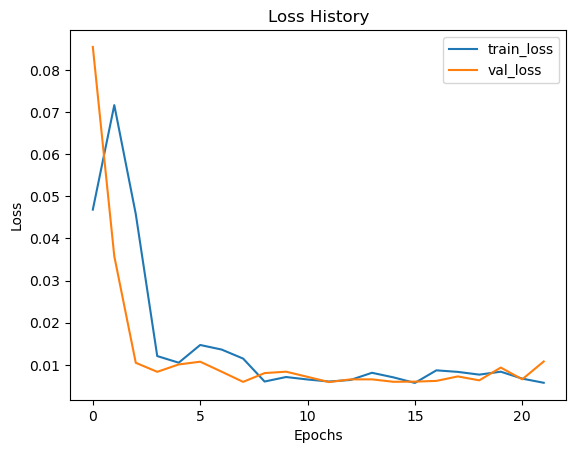

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

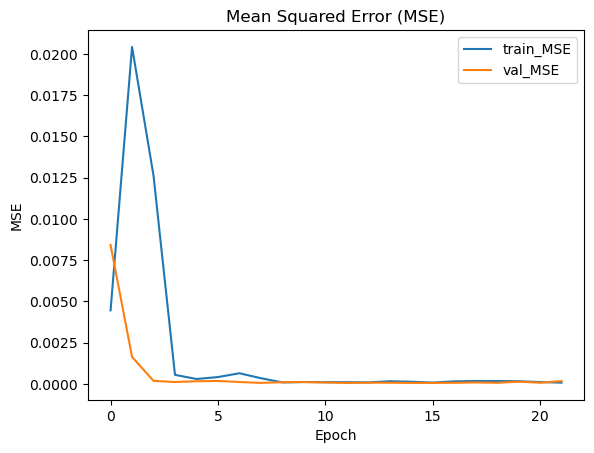

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

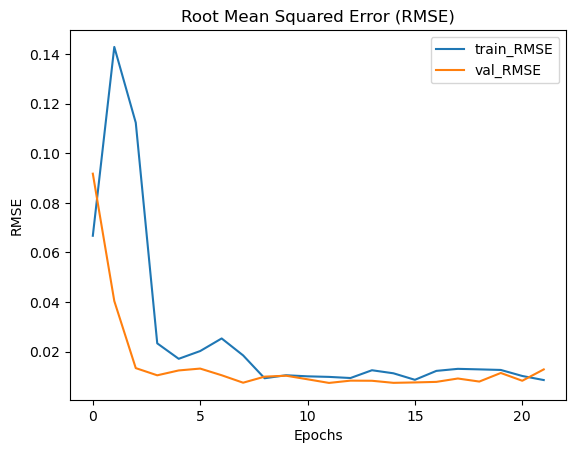

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

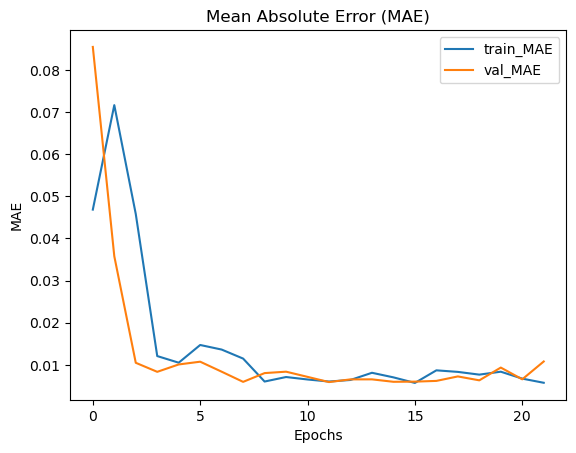

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

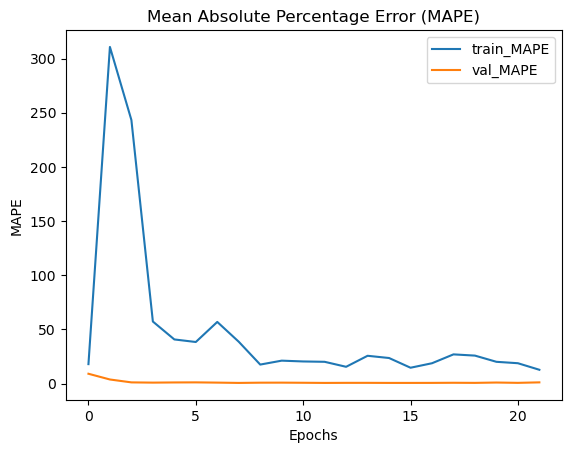

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 18:49:45.993492: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 2)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


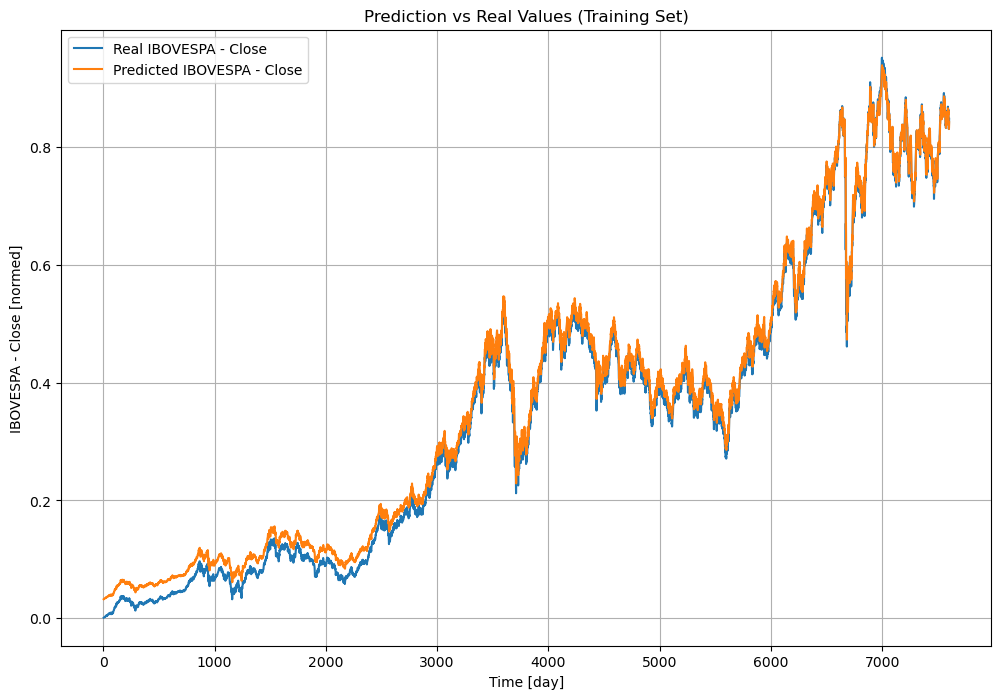

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 2)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


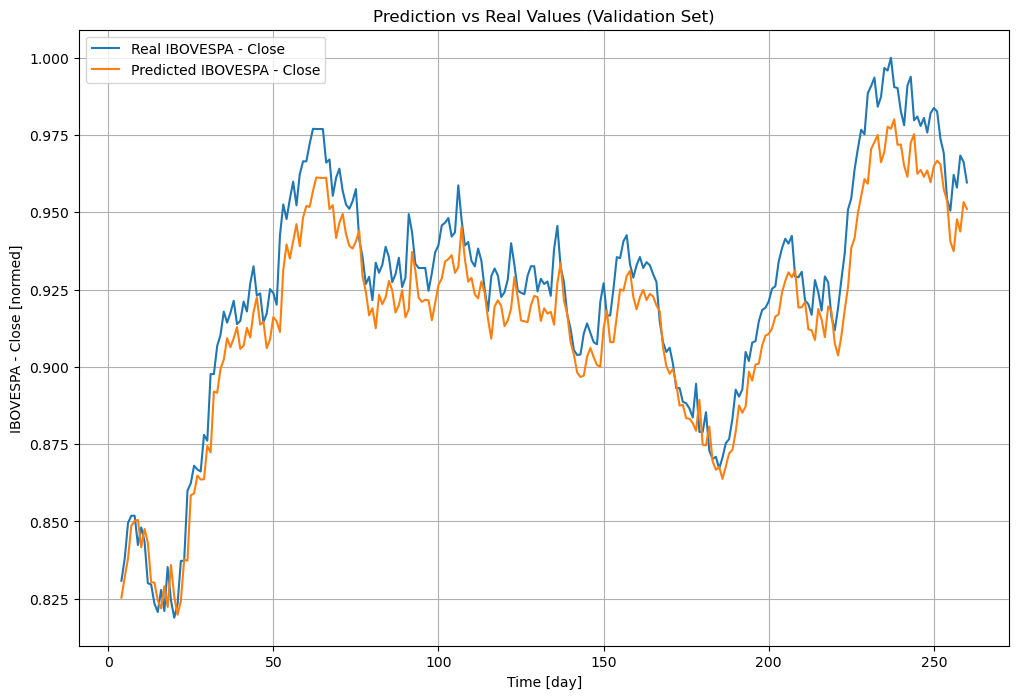

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 2)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


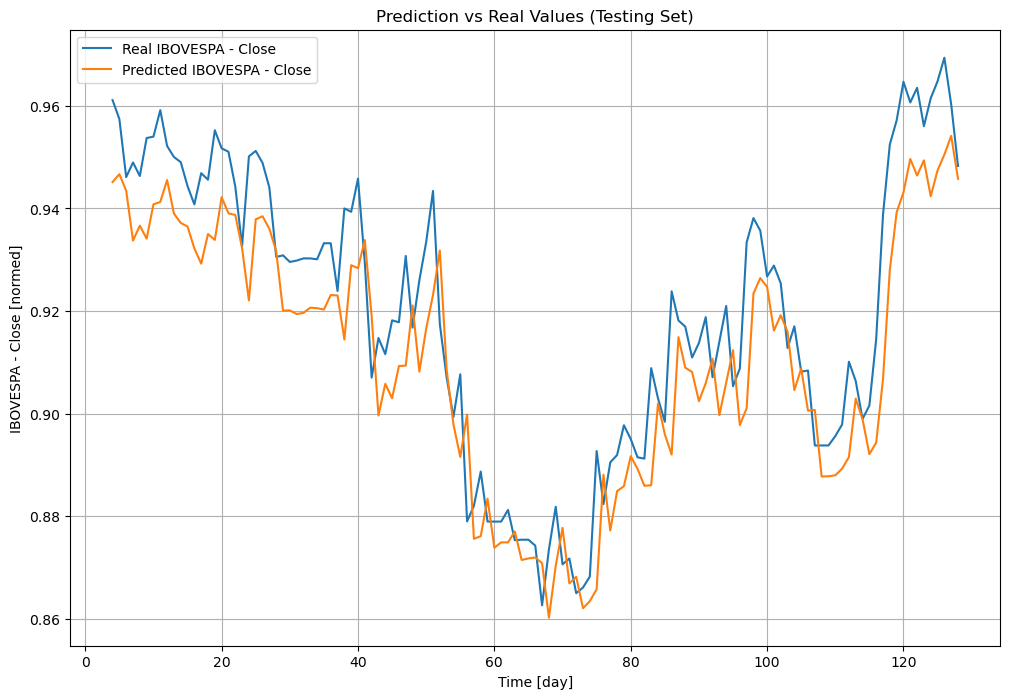

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

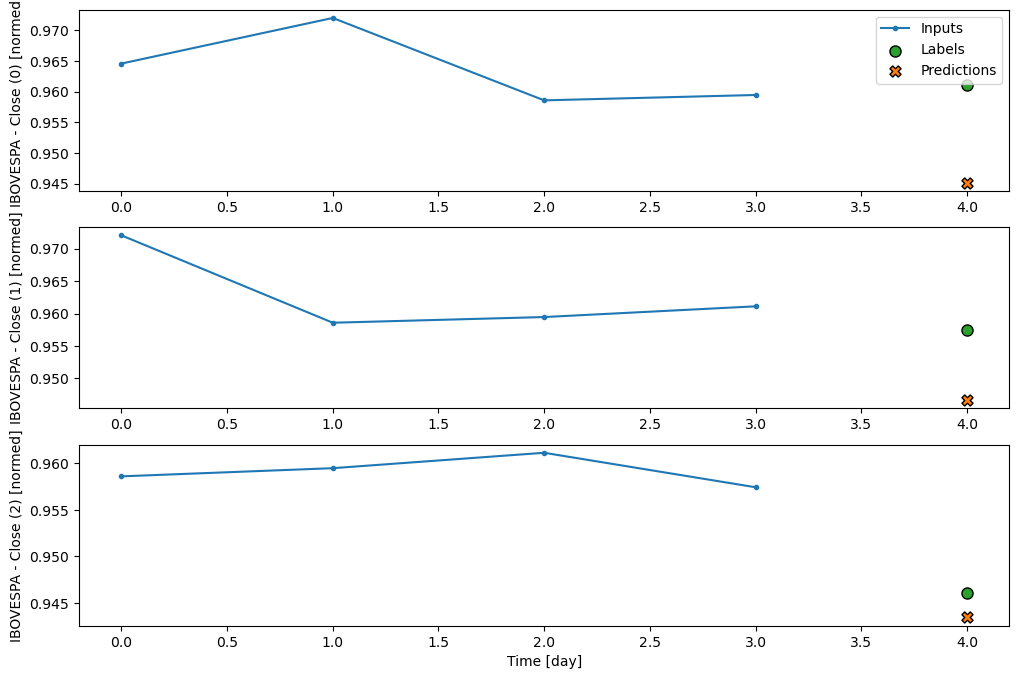

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:52s:490ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[[0.94514734, 0.94514734, 0.94514734, ..., 0.94514734,
         0.94514734, 0.94514734]],

       [[0.9466751 , 0.9466751 , 0.9466751 , ..., 0.9466751 ,
         0.9466751 , 0.9466751 ]],

       [[0.9434599 , 0.9434599 , 0.9434599 , ..., 0.9434599 ,
         0.9434599 , 0.9434599 ]],

       ...,

       [[0.9504905 , 0.9504905 , 0.9504905 , ..., 0.9504905 ,
         0.9504905 , 0.9504905 ]],

       [[0.9541436 , 0.9541436 , 0.9541436 , ..., 0.9541436 ,
         0.9541436 , 0.9541436 ]],

       [[0.9457726 , 0.9457726 , 0.9457726 , ..., 0.9457726 ,
         0.9457726 , 0.9457726 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')